MSDS 432

Module 6 - Breadth First Search Algorithm

Prepared by Vincent Pun

In [7]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import scipy.stats as stats

import os
import time
import datetime

#plot
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

np.random.seed(888)

In [5]:
from collections import deque

In this exercise, we will begin to explore the concept of graphs and use it in a Breadth First Search.  We will begin with the base code for as described in Chapter 6 of Grokking Algorithms (Bhargava 2016).  

Example code for the base algorithm is available in the GitHub site for the textbook (https://github.com/egonSchiele/grokking_algorithms/tree/master/06_breadth-first_search/python )

**Example Code - Function (Breadth First Search Algorithm")**

In [3]:
def person_is_seller(name):
      return name[-1] == 'm'

graph = {}
graph["you"] = ["alice", "bob", "claire"]
graph["bob"] = ["anuj", "peggy"]
graph["alice"] = ["peggy"]
graph["claire"] = ["thom", "jonny"]
graph["anuj"] = []
graph["peggy"] = []
graph["thom"] = []
graph["jonny"] = []

def search(name):
    search_queue = deque()
    search_queue += graph[name]
    # This array is how you keep track of which people you've searched before.
    searched = []
    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched: #otherwise possible infinite loop
            if person_is_seller(person):
                print(person + " is a mango seller!")
                return True
            else:
                search_queue += graph[person]
                # Marks this person as searched
                searched.append(person)
    return False

search("you")


thom is a mango seller!


True

***Data***

Create a five level 'connections' graph (all unique, no duplicates).

The first level should have five people and each person in first level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)

Each person in the second level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)

Continue the same for third, fourth, and fifth levels

There should be no reverse connections (i.e. first level can connect to second level but second cannot have any reverse connection with the first, and so on for 3rd, 4th, and 5th levels)

In [4]:
connections = {}

#first level
connections["person1"] = ["connection1", "connection2", "connection3", "connection4", "connection5"]
connections["person2"] = ["anuj", "connection1", "connection6","connection7","connection8"]
connections["person3"] = ["peggy","connection9","connection10","connection11","anuj"]
connections["person4"] = ["thom", "jonny","connection12","connection13","connection14"]
connections["person5"] = ["peggy","anuj","connection15","connection16","connection17"]

#second level
connections["peggy"] = ['c18','c19','c20','c21','c22']
connections["anuj"] = ['c18','c19','c20','c21','c22']
connections["connection15"] = ['c18','c19','c20','c21','c22']
connections["connection16"] = ['c18','c19','c20','c21','c22']
connections["connection17"] = ['c18','c19','c20','c21','c22']

#third level
connections['c18'] = ['c23','c24','c25','c26','c27']
connections['c19'] = ['c23','c24','c25','c26','c27']
connections['c20'] = ['c23','c24','c25','c26','c27']
connections['c21'] = ['c23','c24','c25','c26','c27']
connections['c22'] = ['c23','c24','c25','c26','c27']

#fourth level
connections['c23'] = ['c28','c29','c30','c31','c32'] 
connections['c24'] = ['c28','c29','c30','c31','c32'] 
connections['c25'] = ['c28','c29','c30','c31','c32'] 
connections['c26'] = ['c28','c29','c30','c31','c32'] 
connections['c27'] = ['c28','c29','c30','c31','c32'] 

#fifth level
connections['c28'] = ['c33','c34','c35','c36','c37']
connections['c29'] = ['c33','c34','c35','c36','c37']
connections['c30'] = ['c33','c34','c35','c36','c37']
connections['c31'] = ['c33','c34','c35','c36','c37']
connections['c32'] = ['c33','c34','c35','c36','c37']

Now search for three people on each level and capture the time for each search.


***Breadth First Search Algorithm - Revised***

In [24]:
def search2(name):
    search_queue = deque()
    search_queue += connections
    # This array is how you keep track of which people you've searched before.
    searched = []

    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched: #otherwise possible infinite loop

            if person == name:
                return True

            else:
                search_queue += connections[person]

                # Marks this person as searched
                searched.append(person)
    print('Not found')            
    return False


***Benchmark***

In [30]:
searchlvl1 = ['person1','person2','person3']
searchlvl2 = ['peggy','anuj','connection15']
searchlvl3 = ['c20','c21','c22']
searchlvl4 = ['c24','c25','c26']
searchlvl5 = ['c30','c31','c32']

search = [searchlvl1,searchlvl2,searchlvl3,searchlvl4,searchlvl5]

times = []

for item in search:
    start=time.time() #start time

    for person in item:
        result = search2(person)

    end = time.time() #end time

    executiontime = 1000*(end-start) #time in ms
    
    times.append(executiontime) #push execution time to times list

times


[0.010967254638671875,
 0.012159347534179688,
 0.022172927856445312,
 0.027894973754882812,
 0.04124641418457031]

**Table**

Organize the results of the study into an table showing the 'name' that you searched for, the level of the search (first, second, third, fourth, fifth), and the time it took.  Discuss any findings.

In [32]:
SearchLevel = [1,2,3,4,5]

table = pd.DataFrame(list(zip(search,SearchLevel,times)),columns=['Names','Level','Execution Time (ms)'])

table

,Names,Level,Execution Time (ms)
0,"[person1, person2, person3]",1,0.010967
1,"[peggy, anuj, connection15]",2,0.012159
2,"[c20, c21, c22]",3,0.022173
3,"[c24, c25, c26]",4,0.027895
4,"[c30, c31, c32]",5,0.041246


Using the average time for each level, create a plot and compare times at each level (five bars or any other suitable visual).  Discuss any findings.

Text(0.5, 1.0, 'Average Time per Level (Breadth First Search Algorithm)')

Text(0, 0.5, 'Execution Time (ms)')

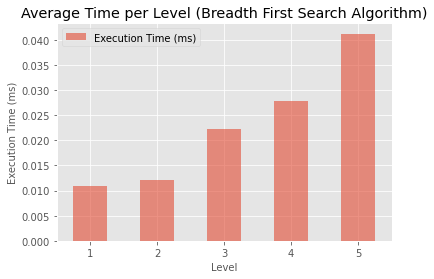

In [50]:
table.plot.bar(x='Level',y='Execution Time (ms)',rot=0, alpha=0.6)
plt.title('Average Time per Level (Breadth First Search Algorithm)')
plt.ylabel('Execution Time (ms)')
plt.show()

Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook.  Explain how the algorithm works and why it is a useful to data engineers.

Program code should conform to best practices in software development, as described in the coding/software development textbook used in the course.

Continue using your git repository.

In this exercise, we utliize a breadth-first search algorithm to see if there is an identifiable path to specific names in a dictionary called "connections." We start with a group of five names (level 1) along with their connections. A path is created from each level based on personal relationships, which is presented in the form of five layers. 

Based on the obervations above, we see that it takes longer to search for people who are located in level 5, as the shortest path to reach them requires the algorithm to search through levels 1 through 4 because iterating over keys in a queue operates on a first in first out basis. 

Breadth-first search complexity increases based on the number of vertices (people) and edges (# of steps in the path), which can be described as taking O(Vertices + Edges). Therefore, this search technique should only be used sparingly when one needs to determine the shortest path between two points. 

